In [1]:
#Cryptocurrency Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [2]:


df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')

In [3]:
#As the first column is useless we can drop it
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
#lets check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


In [5]:
'''converting date & time dtypes'''
df['date']=pd.to_datetime(df['date']).dt.normalize()
df['date']


,date
0,2013-05-05
1,2013-05-05
2,2013-05-06
3,2013-05-06
4,2013-05-07
...,...
72941,2022-10-23
72942,2022-10-23
72943,2022-10-23
72944,2022-10-23


In [6]:
df['timestamp']=pd.to_datetime(df['timestamp']).dt.normalize()
df['timestamp']


,timestamp
0,2013-05-05 00:00:00+00:00
1,2013-05-05 00:00:00+00:00
2,2013-05-06 00:00:00+00:00
3,2013-05-06 00:00:00+00:00
4,2013-05-07 00:00:00+00:00
...,...
72941,2022-10-23 00:00:00+00:00
72942,2022-10-23 00:00:00+00:00
72943,2022-10-23 00:00:00+00:00
72944,2022-10-23 00:00:00+00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float64            
 1   high         72946 non-null  float64            
 2   low          72946 non-null  float64            
 3   close        72946 non-null  float64            
 4   volume       72946 non-null  float64            
 5   marketCap    72946 non-null  float64            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
 8   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), object(1)
memory usage: 5.0+ MB


In [8]:
'''
Data Pre-processing
'''
#checking the null columns
df.isnull().sum()

,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
timestamp,0
crypto_name,0
date,0


There are no null/missing values in the dataset

In [9]:
#checking the duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicates in the dataset

In [10]:
'''Exploratory Data Analysis'''
df.describe()

,open,high,low,close,volume,marketCap,date
count,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04,72946
mean,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10,2019-10-13 03:20:59.945713152
min,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-05 00:00:00
25%,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08,2018-09-08 00:00:00
50%,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09,2020-03-17 00:00:00
75%,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09,2021-05-02 00:00:00
max,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10,NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_bit=[df["crypto_name"]=='Bitcoin']

# lets draw the line graph
plt.figure(figsize=(12,6))
plt.plot(df["date"],df["open"])
plt.title("Open price over time")
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.savefig("openprice.png",dpi=300)
plt.close()

In [ ]:
sns.histplot(df['open'], bins=100, kde=True)
plt.title('Distribution of Open Prices')
plt.savefig("openhist.png",dpi=300)
plt.close()

In [ ]:
plt.figure(figsize=(35,13))
plt.subplot(3,2,1)
plt.plot(df["date"],df["close"])
plt.title("Close over time")
plt.xlabel("Date")
plt.ylabel("Close")
plt.subplot(3,2,2)
plt.hist(df["close"],bins=50)
plt.title("Close Distribution")
plt.xlabel("Date")
plt.ylabel("close")
plt.axis("equal")

plt.subplot(3,2,3)
plt.plot(df["date"],df["high"])
plt.title("High over time")
plt.xlabel("Date")
plt.ylabel("High")
plt.subplot(3,2,4)
plt.hist(df["high"],bins=50)
plt.title("High Distribution")
plt.xlabel("Date")
plt.ylabel("High")

plt.subplot(3,2,5)
plt.plot(df["date"],df["low"])
plt.title("Low over time")
plt.xlabel("Date")
plt.ylabel("Low")
plt.subplot(3,2,6)
plt.hist(df["low"],bins=50)
plt.title("Low Distribution")
plt.xlabel("Date")
plt.ylabel("low")


plt.savefig("all.png",dpi=300)
plt.close()

In [ ]:
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
plt.title("Volume over time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.plot(df["date"],df["volume"])
plt.subplot(2,2,2)
plt.hist(df["volume"],bins=50)
plt.title("Volume Distribution")
plt.xlabel("Date")
plt.ylabel("Volume")


plt.subplot(2,2,3)
plt.plot(df["date"],df["marketCap"])
plt.subplot(2,2,4)
plt.hist(df["marketCap"],bins=50)
plt.title("MrketCap Distribution")
plt.xlabel("Date")
plt.ylabel("MarketCap")

plt.savefig("vol.png",dpi=300)
plt.close()

In [ ]:
#let see the average of all categorirs present in crypto_name
df.groupby('crypto_name')[['open','high','low','close','volume','marketCap']].mean()

,open,high,low,close,volume,marketCap
crypto_name,,,,,,
Aave,237.987994,250.891194,225.113092,238.515813,3.993121e+08,3.059193e+09
Algorand,0.696573,0.735039,0.657055,0.694850,2.169128e+08,2.384931e+09
ApeCoin,8.533293,9.669442,8.080370,8.695041,8.131745e+08,2.508361e+09
Aptos,8.939706,10.246318,8.930175,9.768685,1.563615e+09,1.269929e+09
Avalanche,38.369759,40.710076,36.281940,38.470000,5.862590e+08,8.123635e+09
BNB,110.803217,114.869960,106.463296,111.075390,8.281823e+08,1.774417e+10
Basic Attention Token,0.378087,0.397526,0.358511,0.377941,1.168916e+08,5.130205e+08
Binance USD,1.000827,1.005450,0.997129,1.000859,2.781233e+09,5.704603e+09
Bitcoin,9682.454544,9937.632202,9403.188862,9694.587144,1.243484e+10,1.777921e+11


In [ ]:
import seaborn as sns
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
sns.lineplot(x='date', y='close',hue='crypto_name', data=df)
plt.title('Close Price Trends by Crypto')

plt.subplot(2,2,2)
sns.lineplot(x='date', y='open',hue='crypto_name', data=df)
plt.title('Open Price Trends by Crypto')

plt.savefig("cat.png",dpi=300)
plt.close()

In [ ]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df[['open','high','low','close','volume','marketCap']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Crypto Variables')

plt.savefig("cor.png",dpi=300)
plt.close()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float64            
 1   high         72946 non-null  float64            
 2   low          72946 non-null  float64            
 3   close        72946 non-null  float64            
 4   volume       72946 non-null  float64            
 5   marketCap    72946 non-null  float64            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
 8   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), object(1)
memory usage: 5.0+ MB


In [12]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['open','high','low','close','volume','marketCap']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     feature          VIF
0      const     0.000000
1       open  1008.937333
2       high   189.849382
3        low  1642.439129
4      close  1326.697126
5     volume     1.287484
6  marketCap     2.165563


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [13]:



# Daily volatility: difference between high and low
df['high_low_spread'] = df['high'] - df['low']

# Daily momentum: difference between close and open
df['close_open_diff'] = df['close'] - df['open']

print(df[['date','high_low_spread','close_open_diff']].head())

        date  high_low_spread  close_open_diff
0 2013-05-05        11.657005         3.010002
1 2013-05-05         0.346400         0.097760
2 2013-05-06        18.023003        -3.680000
3 2013-05-06         0.665000        -0.222970
4 2013-05-07        15.744003        -0.750000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   open             72946 non-null  float64            
 1   high             72946 non-null  float64            
 2   low              72946 non-null  float64            
 3   close            72946 non-null  float64            
 4   volume           72946 non-null  float64            
 5   marketCap        72946 non-null  float64            
 6   timestamp        72946 non-null  datetime64[ns, UTC]
 7   crypto_name      72946 non-null  object             
 8   date             72946 non-null  datetime64[ns]     
 9   high_low_spread  72946 non-null  float64            
 10  close_open_diff  72946 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(8), object(1)
memory usage: 6.1+ MB


In [15]:
df.drop(columns=['open','low','high','close','date'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   volume           72946 non-null  float64            
 1   marketCap        72946 non-null  float64            
 2   timestamp        72946 non-null  datetime64[ns, UTC]
 3   crypto_encoded   72946 non-null  int64              
 4   high_low_spread  72946 non-null  float64            
 5   close_open_diff  72946 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 3.3 MB


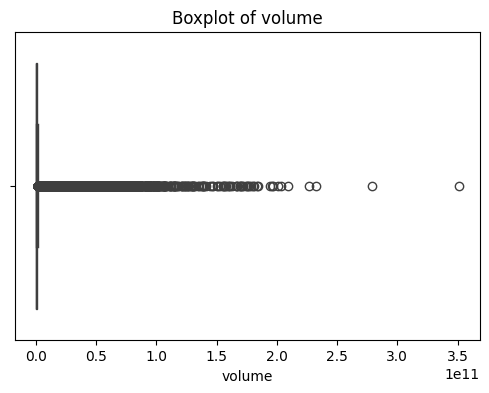

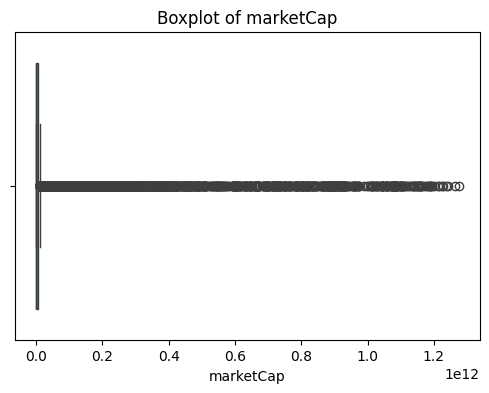

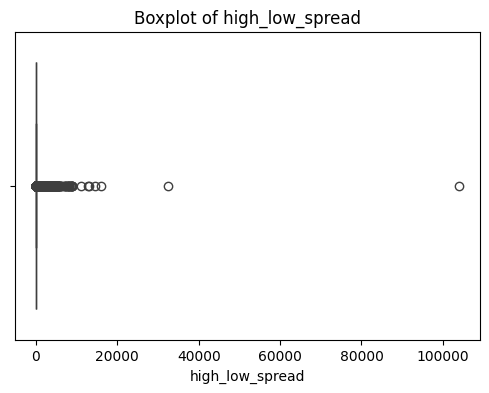

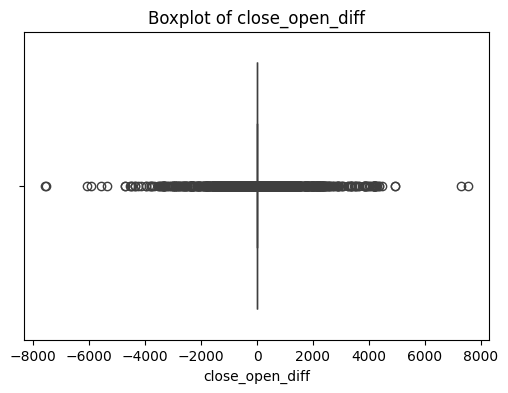

In [ ]:
#checking outliers
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['volume','marketCap','high_low_spread','close_open_diff']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
'''
from the boxplot we can see that the volume,high_low_spread,close_open_diff have the outliers
'''
numeric_cols = ['volume','high_low_spread','close_open_diff']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


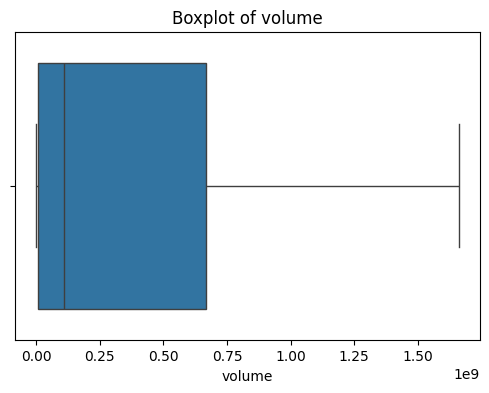

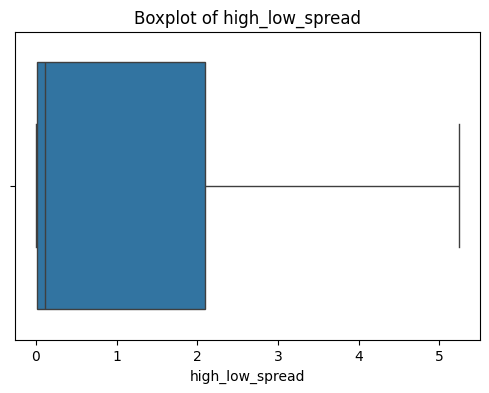

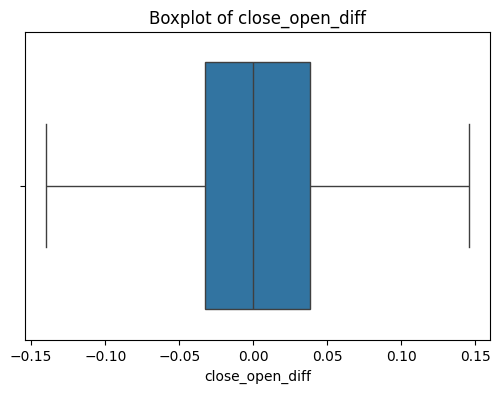

In [18]:
import seaborn as sns
numeric_cols = ['volume','high_low_spread','close_open_diff']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [19]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# --- Step 1: Encode crypto_name ---
le = LabelEncoder()
df['crypto_encoded'] = le.fit_transform(df['crypto_name'])

# --- Step 2: Add cyclical day features ---
df['day_of_week'] = df['timestamp'].dt.dayofweek.astype(int)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)

# --- Step 3: Define numeric columns ---
numeric_cols = ['volume','marketCap','high_low_spread','close_open_diff',
                'crypto_encoded','day_sin','day_cos']

# --- Step 4: Build pipeline ---
pipeline = Pipeline([
    ("scaler", StandardScaler()),
])

X = df[numeric_cols]
pca_result = pipeline.fit_transform(X)


print(pca_result)

[[ 1.08733554]
 [-0.77256695]
 [ 0.94307288]
 ...
 [-0.56665208]
 [-1.04368974]
 [-0.49167067]]


In [26]:
pca_step = pipeline.named_steps["pca"]


print("Explained variance ratio:", pca_step.explained_variance_ratio_)


Explained variance ratio: [0.24685439]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   volume           72946 non-null  float64            
 1   marketCap        72946 non-null  float64            
 2   timestamp        72946 non-null  datetime64[ns, UTC]
 3   crypto_name      72946 non-null  object             
 4   high_low_spread  72946 non-null  float64            
 5   close_open_diff  72946 non-null  float64            
 6   crypto_encoded   72946 non-null  int64              
 7   day_of_week      72946 non-null  int64              
 8   day_sin          72946 non-null  float64            
 9   day_cos          72946 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(1)
memory usage: 5.6+ MB


In [21]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(10,15):
  kmeans = KMeans(n_clusters=i, random_state=42)
  clusters = kmeans.fit_predict(pca_result)
  score = silhouette_score(pca_result, clusters)
  print(f"silhouette_score for cluster {i} - {score} ")

silhouette_score for cluster 10 - 0.5403262664959332 
silhouette_score for cluster 11 - 0.546823876078849 
silhouette_score for cluster 12 - 0.5356220055714923 
silhouette_score for cluster 13 - 0.5440166704417113 
silhouette_score for cluster 14 - 0.5336035179052055 


From the above code we can see that PCA with n_components=1 giving the best silhouette_score and n_clusters can be 6 to 9 because inertia should be minimum

{2: 50890.348337729854, 3: 28788.94145458346, 4: 15334.010098648605, 5: 10140.590261780097, 6: 7201.742888749628, 7: 4772.455839043986, 8: 4020.388530634536, 9: 3083.3428513696044}


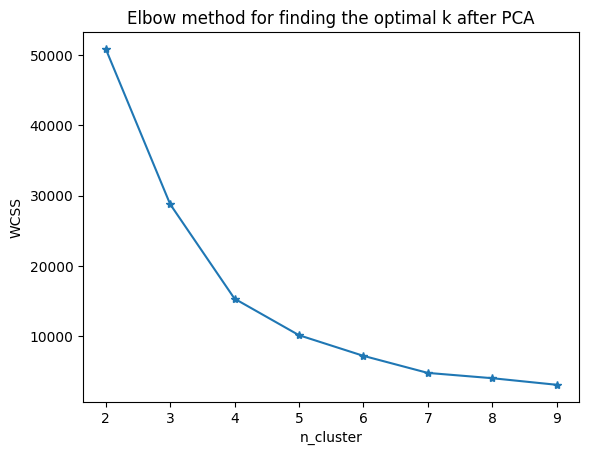

In [23]:
from sklearn.cluster import KMeans
wcss={}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_result)
    wcss[i]=kmeans.inertia_
print(wcss)
plt.figure()
plt.plot(range(2,10),wcss.values(),marker='*')
plt.title("Elbow method for finding the optimal k after PCA")
plt.xlabel("n_cluster")
plt.ylabel("WCSS")
plt.show()


from the elbow method we can choose 7  as WCSS remains slightly unchanged

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(6,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_result)
    score = silhouette_score(pca_result, clusters)
    print(f"silhouette_score for cluster {i} - {score} and inertia {kmeans.inertia_}")


silhouette_score for cluster 6 - 0.5654244974396998 and inertia 7201.742888749628
silhouette_score for cluster 7 - 0.5744379025455216 and inertia 4772.455839043986
silhouette_score for cluster 8 - 0.5725484030471961 and inertia 4020.388530634536
silhouette_score for cluster 9 - 0.5611528435295908 and inertia 3083.3428513696044


In [25]:
#Applying Kmeans with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(pca_result)
print(clusters)


[2 0 2 ... 0 4 0]


In [29]:
df.head()

,volume,marketCap,timestamp,crypto_name,high_low_spread,close_open_diff,crypto_encoded,day_of_week,day_sin,day_cos
0,0.0,1.288693e+09,2013-05-05 00:00:00+00:00,Bitcoin,5.242289,0.145647,8,6,-0.781831,0.62349
1,0.0,6.229819e+07,2013-05-05 00:00:00+00:00,Litecoin,0.346400,0.097760,30,6,-0.781831,0.62349
2,0.0,1.249023e+09,2013-05-06 00:00:00+00:00,Bitcoin,5.242289,-0.139802,8,0,0.000000,1.00000
3,0.0,5.859436e+07,2013-05-06 00:00:00+00:00,Litecoin,0.665000,-0.139802,30,0,0.000000,1.00000
4,0.0,1.240594e+09,2013-05-07 00:00:00+00:00,Bitcoin,5.242289,-0.139802,8,1,0.781831,0.62349


In [30]:
import pandas as pd

pca_series = pd.Series(pca_result.flatten(), name="PC1")

print(pca_series.head())

0    1.087336
1   -0.772567
2    0.943073
3   -0.801691
4    0.973159
Name: PC1, dtype: float64


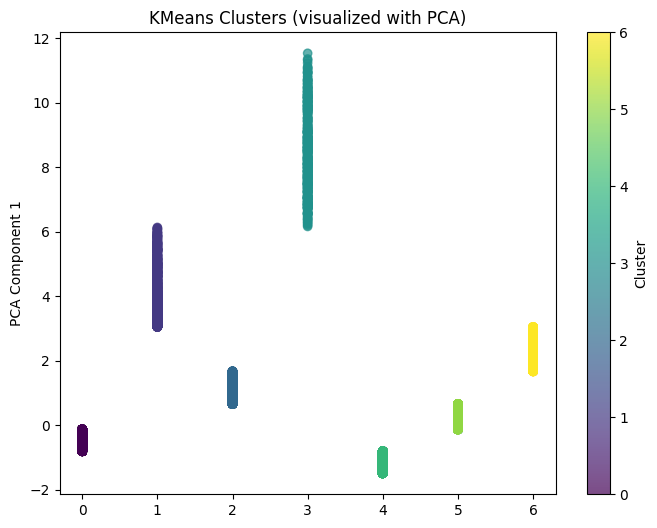

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(
    clusters,
    pca_series,
    c=clusters,
    cmap='viridis',
    alpha=0.7
)
plt.ylabel('PCA Component 1')
plt.title('KMeans Clusters (visualized with PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
pca_series

,PC1
0,1.087336
1,-0.772567
2,0.943073
3,-0.801691
4,0.973159
...,...
72941,-1.396761
72942,-0.743842
72943,-0.566652
72944,-1.043690


In [34]:
import pandas as pd


# Save to Excel
pca_series.to_excel('pca.xlsx', index=False)

hierarchical clustering doesn’t scale well for large datasets



In [35]:
df.head()

,volume,marketCap,timestamp,crypto_name,high_low_spread,close_open_diff,crypto_encoded,day_of_week,day_sin,day_cos
0,0.0,1.288693e+09,2013-05-05 00:00:00+00:00,Bitcoin,5.242289,0.145647,8,6,-0.781831,0.62349
1,0.0,6.229819e+07,2013-05-05 00:00:00+00:00,Litecoin,0.346400,0.097760,30,6,-0.781831,0.62349
2,0.0,1.249023e+09,2013-05-06 00:00:00+00:00,Bitcoin,5.242289,-0.139802,8,0,0.000000,1.00000
3,0.0,5.859436e+07,2013-05-06 00:00:00+00:00,Litecoin,0.665000,-0.139802,30,0,0.000000,1.00000
4,0.0,1.240594e+09,2013-05-07 00:00:00+00:00,Bitcoin,5.242289,-0.139802,8,1,0.781831,0.62349


In [36]:
df1=df.copy()
df1.sample()

,volume,marketCap,timestamp,crypto_name,high_low_spread,close_open_diff,crypto_encoded,day_of_week,day_sin,day_cos
16344,1.596290e+09,5.373503e+10,2018-06-20 00:00:00+00:00,Ethereum,5.242289,-0.139802,22,2,0.974928,-0.222521


In [37]:
clusters

array([2, 0, 2, ..., 0, 4, 0], dtype=int32)

In [38]:
# Add clusters as a new column
df['cluster'] = clusters
print(df.head())

   volume     marketCap                 timestamp crypto_name  \
0     0.0  1.288693e+09 2013-05-05 00:00:00+00:00     Bitcoin   
1     0.0  6.229819e+07 2013-05-05 00:00:00+00:00    Litecoin   
2     0.0  1.249023e+09 2013-05-06 00:00:00+00:00     Bitcoin   
3     0.0  5.859436e+07 2013-05-06 00:00:00+00:00    Litecoin   
4     0.0  1.240594e+09 2013-05-07 00:00:00+00:00     Bitcoin   

   high_low_spread  close_open_diff  crypto_encoded  day_of_week   day_sin  \
0         5.242289         0.145647               8            6 -0.781831   
1         0.346400         0.097760              30            6 -0.781831   
2         5.242289        -0.139802               8            0  0.000000   
3         0.665000        -0.139802              30            0  0.000000   
4         5.242289        -0.139802               8            1  0.781831   

   day_cos  cluster  
0  0.62349        2  
1  0.62349        0  
2  1.00000        2  
3  1.00000        0  
4  0.62349        2  


In [39]:
df.to_csv('clustered_data.csv', index=False)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   volume           72946 non-null  float64            
 1   marketCap        72946 non-null  float64            
 2   timestamp        72946 non-null  datetime64[ns, UTC]
 3   crypto_name      72946 non-null  object             
 4   high_low_spread  72946 non-null  float64            
 5   close_open_diff  72946 non-null  float64            
 6   crypto_encoded   72946 non-null  int64              
 7   day_of_week      72946 non-null  int64              
 8   day_sin          72946 non-null  float64            
 9   day_cos          72946 non-null  float64            
 10  cluster          72946 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), int64(2), object(1)
memory usage: 5.8+ MB


Note: I kept Supervisied learning code in another file(scry.ipynb)